# Original Graph

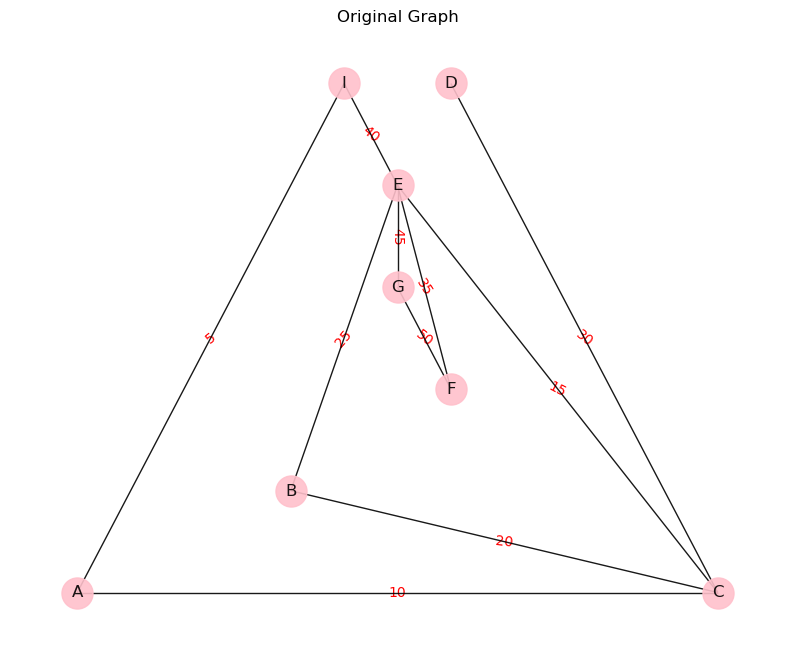

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Your original graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C",10),("A","I",5),("C","B",20),("C","E",15),("C","D",30),("B","E",25),("I","E",40),("E","F",35),("F","G",50),("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Apply Kruskal's algorithm
T = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Draw the original graph
pos = nx.planar_layout(G)  # Seed for reproducible layout
plt.figure(figsize=(10, 8))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red')
nx.draw(G, pos=pos, with_labels=True, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9)
plt.title("Original Graph")
plt.show()

# Kruskal's Algorithm

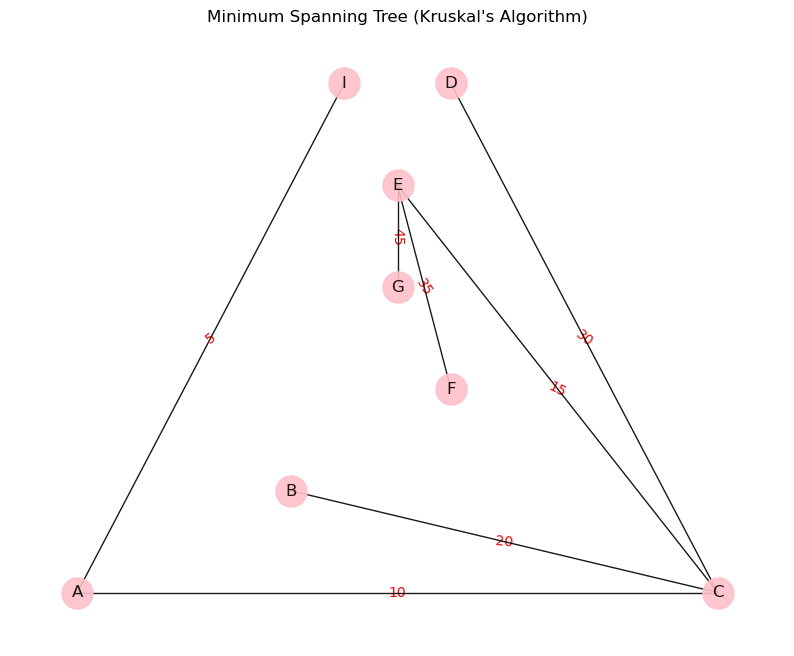

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Your original graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C",10),("A","I",5),("C","B",20),("C","E",15),("C","D",30),("B","E",25),("I","E",40),("E","F",35),("F","G",50),("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Manual implementation of Kruskal's algorithm
def kruskal(graph):
    T = nx.Graph()
    edges = list(graph.edges(data=True))
    edges.sort(key=lambda x: x[2]['weight'])
    subsets = {node: {node} for node in graph.nodes()}

    for u, v, d in edges:
        if subsets[u] != subsets[v]:
            T.add_edge(u, v, weight=d['weight'])
            union = subsets[u].union(subsets[v])
            for node in union:
                subsets[node] = union

        if len(T.edges) == len(graph.nodes()) - 1:
            break

    return T

# Apply Kruskal's algorithm
T_kruskal = kruskal(G)

# Draw the minimum spanning tree (Kruskal's Algorithm)
pos = nx.planar_layout(G)  # Seed for reproducible layout
plt.figure(figsize=(10, 8))
nx.draw_networkx_edge_labels(T_kruskal, pos, edge_labels=nx.get_edge_attributes(T_kruskal, 'weight'), font_color='red')
nx.draw(T_kruskal, pos=pos, with_labels=True, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9)
plt.title("Minimum Spanning Tree (Kruskal's Algorithm)")
plt.show()


# Prim's Algorithm

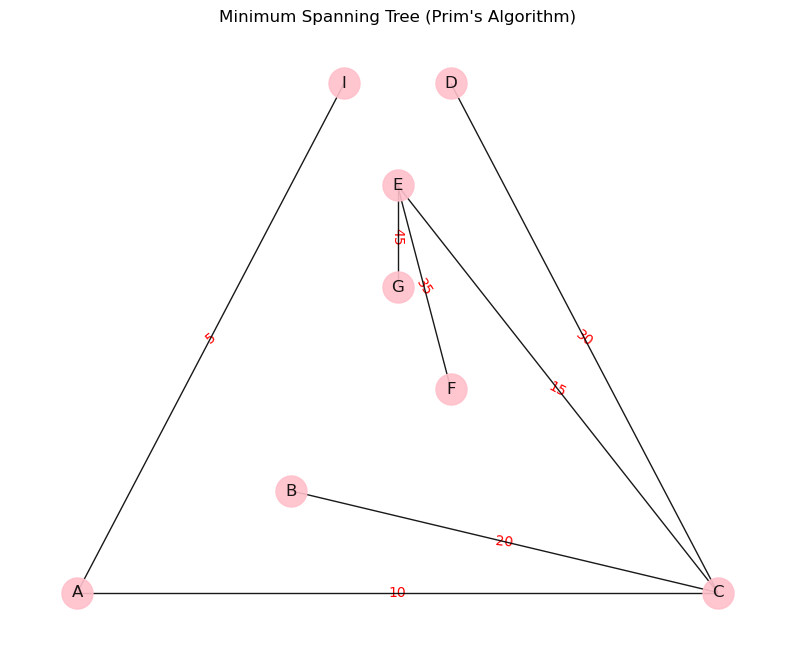

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Your original graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C",10),("A","I",5),("C","B",20),("C","E",15),("C","D",30),("B","E",25),("I","E",40),("E","F",35),("F","G",50),("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Manual implementation of Prim's algorithm
def prim(graph, start):
    mst = nx.Graph()
    visited = set([start])
    edges = [
        (graph[start][to]['weight'], start, to)
        for to in graph[start]
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst.add_edge(frm, to, weight=cost)
            for to_next in graph[to]:
                if to_next not in visited:
                    heapq.heappush(edges, (graph[to][to_next]['weight'], to, to_next))

    return mst

# Apply Prim's algorithm
T_prim = prim(G, "A")

# Draw the minimum spanning tree (Prim's Algorithm)
plt.figure(figsize=(10, 8))
nx.draw_networkx_edge_labels(T_prim, pos, edge_labels=nx.get_edge_attributes(T_prim, 'weight'), font_color='red')
nx.draw(T_prim, pos=pos, with_labels=True, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9)
plt.title("Minimum Spanning Tree (Prim's Algorithm)")
plt.show()


# Dijkstra's Algorithm

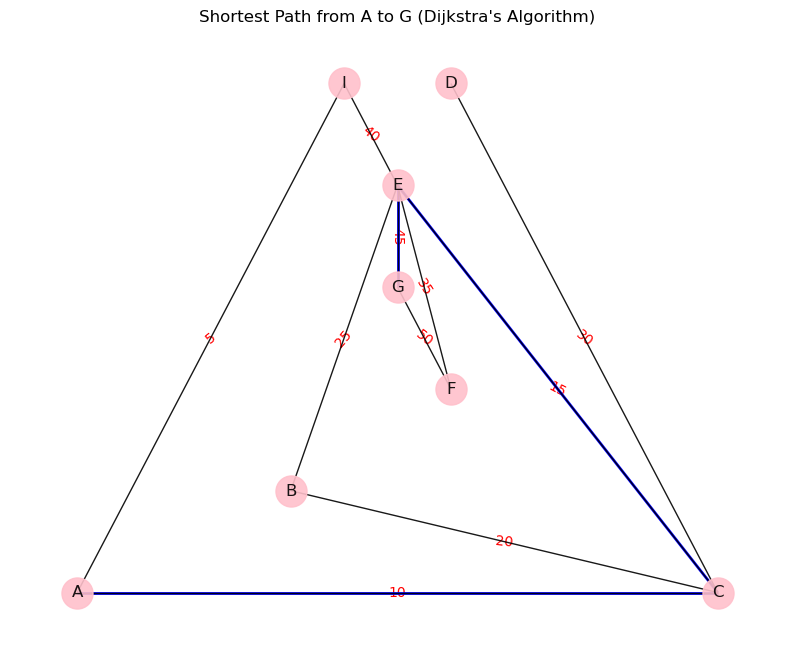

In [4]:
# Your original graph
G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C",10),("A","I",5),("C","B",20),("C","E",15),("C","D",30),("B","E",25),("I","E",40),("E","F",35),("F","G",50),("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Manual implementation of Dijkstra's algorithm
def dijkstra(graph, start):
    D = {start: 0}
    Q = [(0, start)]
    P = {start: None}

    while Q:
        _, v = heapq.heappop(Q)
        for w, d in G[v].items():
            vwLength = D[v] + d['weight']
            if w not in D or vwLength < D[w]:
                D[w] = vwLength
                P[w] = v  # store the previous node
                heapq.heappush(Q, (vwLength, w))

    return D, P

# Apply Dijkstra's algorithm
D, P = dijkstra(G, "A")

# Function to generate shortest path
def shortest_path(P, start, end):
    path = []
    while end:
        path.append(end)
        end = P[end]
    path.reverse()
    return path

# Get the shortest path from A to G
path = shortest_path(P, "A", "G")

# Draw the shortest path from A to G
path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
plt.figure(figsize=(10, 8))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)
nx.draw(G, pos=pos, with_labels=True, edge_color='black', width=1, linewidths=1, node_size=500, node_color='pink', alpha=0.9)
plt.title("Shortest Path from A to G (Dijkstra's Algorithm)")
plt.show()
